**WEIGHTS AND BIAS INITIZATION CASES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential

from keras.callbacks import EarlyStopping

In [2]:
X, y, = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=2, random_state=1)

<Axes: >

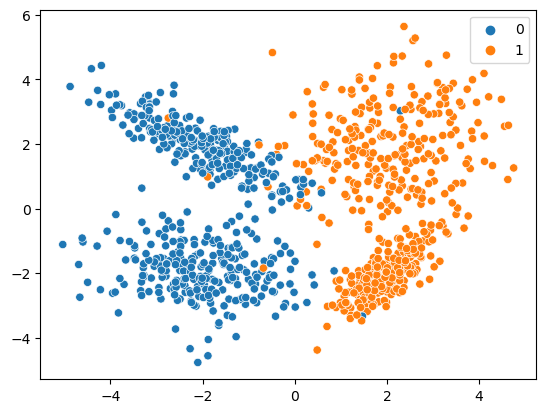

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
#First splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

#Second splitting into test validation
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)


**Standardization**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
std = StandardScaler()

X_traincv = std.fit_transform(X_traincv)
X_testcv = std.transform(X_testcv)

X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [13]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='sigmoid', kernel_initializer=z, bias_initializer=z))
model.add(Dense(units=1,activation='sigmoid'))

In [14]:
model.get_weights()

#Weights should be
#(2, 5)
#(5,1)
#(5, 1)
#(1,1)

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.49878907],
        [-0.85939527],
        [ 0.37100244],
        [-0.8032162 ],
        [ 0.771081  ]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
for i in model.get_weights():
    print(i.shape)

(2, 5)
(5,)
(5, 1)
(1,)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

## CASE - 1.1-- Sigmoid AF and All the wights and bias as 0(ZEROS)

In [16]:
from keras.initializers import Zeros, Constant, ones

In [17]:
z = Zeros()

**Logical Structure**

In [36]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='sigmoid', kernel_initializer=z, bias_initializer=z))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=z, bias_initializer=z))

In [37]:
model.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [38]:
for i in model.get_weights():
    print(i.shape)

(2, 5)
(5,)
(5, 1)
(1,)


In [39]:
model.get_weights()[0].shape

(2, 5)

In [40]:
model.get_weights()[1].shape

(5,)

In [41]:
model.get_weights()[2].shape

(5, 1)

In [42]:
model.get_weights()[3].shape

(1,)

In [43]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

**Compiling**

In [44]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

**Training**

In [45]:
history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4988 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5003 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4931 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5028 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5000 - v

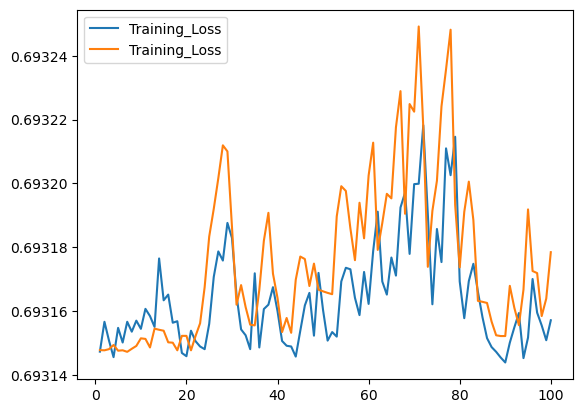

In [46]:
#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

In [47]:
model.get_weights()

#wights has been updated 

[array([[ 8.9378620e-04,  8.9378620e-04,  8.9378620e-04,  8.9378620e-04,
          8.9378620e-04],
        [-2.2366434e-05, -2.2366434e-05, -2.2366434e-05, -2.2366434e-05,
         -2.2366434e-05]], dtype=float32),
 array([-1.4820459e-05, -1.4820459e-05, -1.4820459e-05, -1.4820461e-05,
        -1.4820461e-05], dtype=float32),
 array([[0.00367072],
        [0.00367072],
        [0.00367072],
        [0.00367072],
        [0.00367072]], dtype=float32),
 array([0.00712627], dtype=float32)]

**Conclusion:- Whenever you are using sigmoid activation function, and you initialize all weights and bias as Zeros(0), Internally each hidden layer will act as a single neuron, no matter how many hidden layers and neurons are there.**

* **Ques:- Why its showing same weights after training?**
* **Ans:- Whenever you are using sigmoid activation function, and you initialize all weights and bias as Zeros(0), Internally each hidden layer will act as a single neuron, no matter how many hidden layers and neurons are there. Because of single neurons it is showing same weights.**

## CASE - 1.2-- Tanh AF and All the wights and bias as 0(ZEROS)

In [48]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='tanh', kernel_initializer=z, bias_initializer=z))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=z, bias_initializer=z))

model.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [49]:
for i in model.get_weights():
    print(i.shape)

(2, 5)
(5,)
(5, 1)
(1,)


In [50]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=0)

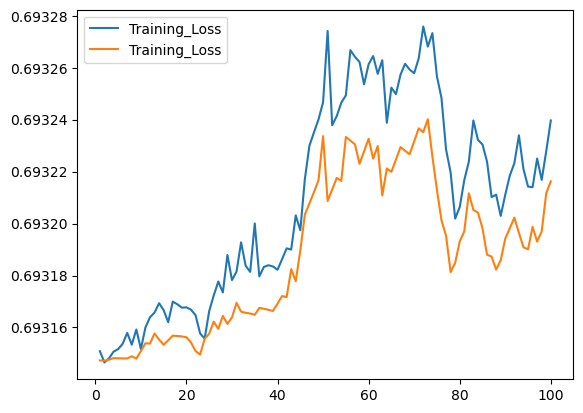

In [51]:
#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

In [52]:
model.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.02350109], dtype=float32)]

## CASE - 2.1-- Sigmoid AF and All the wights and bias as Contant value

In [53]:
from keras.initializers import Constant

In [54]:
con = Constant(value=1)

#default contant value are zero
#thats why we have given 1

In [56]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='sigmoid', kernel_initializer=con, bias_initializer=con))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=con, bias_initializer=con))

model.get_weights()

[array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [57]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=0)

In [58]:
model.get_weights()

[array([[1.1586081, 1.1586081, 1.1586081, 1.1586081, 1.1586081],
        [0.9724285, 0.9724285, 0.9724285, 0.9724285, 0.9724285]],
       dtype=float32),
 array([0.83160055, 0.83160055, 0.83160055, 0.83160055, 0.83160055],
       dtype=float32),
 array([[0.42505902],
        [0.42505902],
        [0.42505902],
        [0.42505902],
        [0.42505902]], dtype=float32),
 array([-0.16422942], dtype=float32)]

****Same weights after updates****

## CASE - 2.2-- Tanh AF and All the wights and bias as Contant value

In [60]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='tanh', kernel_initializer=con, bias_initializer=con))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=con, bias_initializer=con))

model.get_weights()

[array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [61]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=0)

In [62]:
model.get_weights()

[array([[1.3648114, 1.3648114, 1.3648114, 1.3648114, 1.3648114],
        [0.7050289, 0.7050289, 0.7050289, 0.7050289, 0.7050289]],
       dtype=float32),
 array([0.59074765, 0.59074765, 0.59074765, 0.59074765, 0.59074765],
       dtype=float32),
 array([[0.75582767],
        [0.75582767],
        [0.75582767],
        [0.75582767],
        [0.75582767]], dtype=float32),
 array([0.30083197], dtype=float32)]

**Same weights after updates**

## CASE - 2.3-- Relu AF and All the wights and bias as Contant value

In [63]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=5,activation='relu', kernel_initializer=con, bias_initializer=con))
model.add(Dense(units=1,activation='sigmoid', kernel_initializer=con, bias_initializer=con))

model.get_weights()

[array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [64]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=0)

In [ ]:
model.get_weights()

**MAIN CONCLUSION:- Never ever use weights and bias as ZERO VALUE as well as CONSTANT VALUE,Internally each hidden layer will act as a single neuron only, no matter how many hidden layers and neurons are there. Because of single neurons it is showing same weights after updating weights.**